# Taylor series of $e^x$

$$ 
\begin{array}{lll}
e^{ x}  & =  & \sum_{i=0}^{\infty} \frac{x^i}{i!} \\
        & = & 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} +\cdots+ \frac{x^n}{n!} + \cdots  \\
       & = & 1 + x + \frac{x^2}{2!} +  \frac{x^3}{3!}  \cdots+ \frac{x^n}{n!} + O(x^{n+1}) 
\end{array} 
$$


Approximation 
$$ e^{ x}  \approx 1 + x + \frac{x^2}{2!} + + \frac{x^3}{3!}  + \cdots+ \frac{x^n}{n!}$$


Interact code in Sagemath for $ln(x+1)$

```python
# Interact Taylor Series of $$f(x) = e^x$$
# Explanatory example: Taylor Series – wiki.sagemath.org/interact https://wiki.sagemath.org/interact
x   = SR.var('x')
x0  = 0
f   = ln(x+1)
p   = plot(f, -20, 20, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([0 .. 12])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -20, 20, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-1, ymax=10)
```

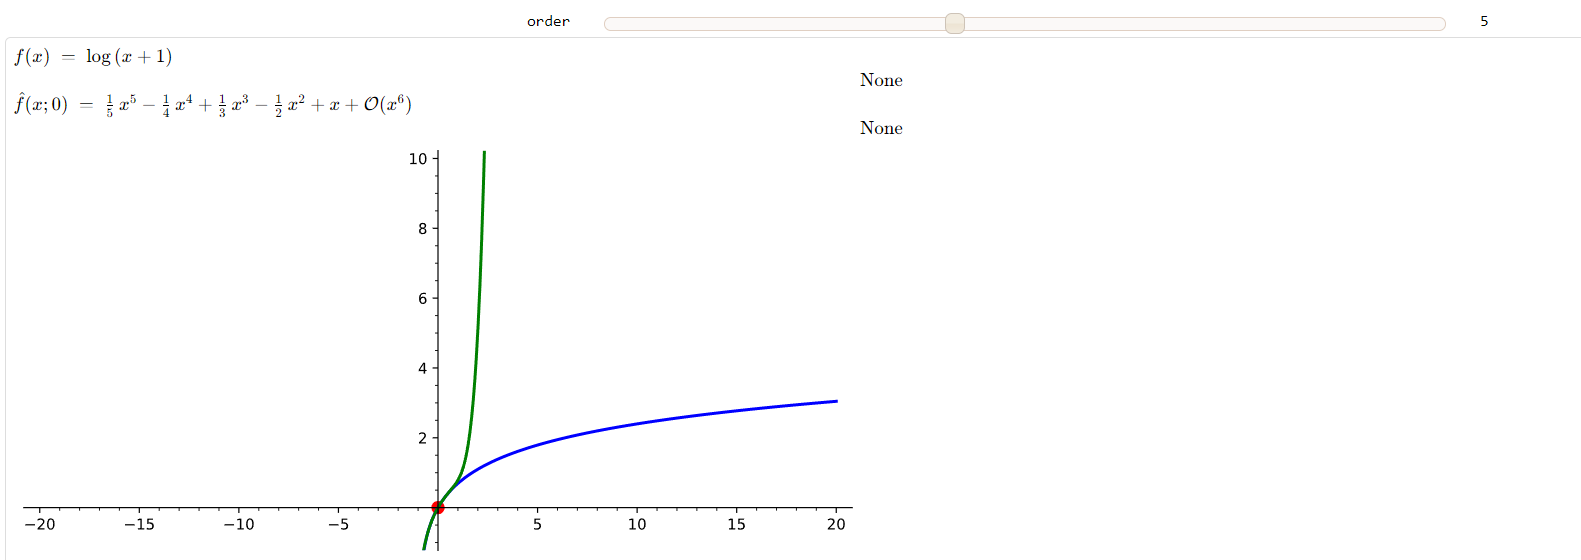

Animate code in Sagemath for $ln(x+1)$
```python
# Animate  Taylor Series of $$f(x) = ln(x+1)$$
# MCS 320: Introduction to Symbolic Computation - Jan Verschelde, Mathematics, U. Illinois at Chicago  –
# http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec27.html#
x   = SR.var('x')
x0  = 0
f   = ln(x+1)
p   = plot(f, -3, 3, thickness=2,legend_label='f(x) = ln(x+1)')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -3,3, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('ln_x_plus_1_taylor_animation_1.gif')
```

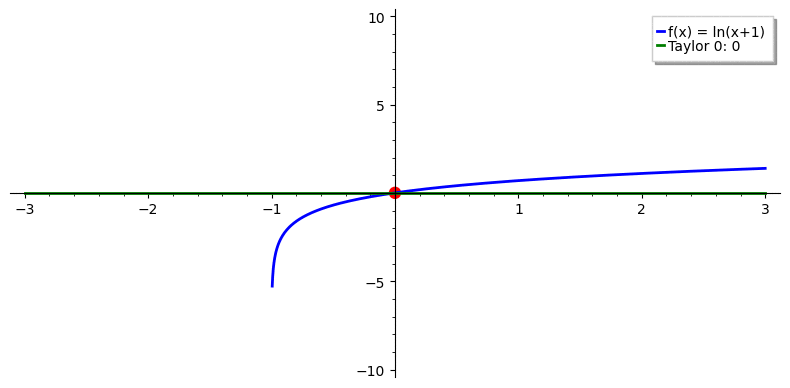 !

#What is value of the partial Taylor series of $ln(x+1)$ up to the  $10$-th term of $ln(x+1)$ about $0$ (Maclaurin  series) for $x=0.5$

$$ ln(x+1) = \sum_{n=1}^{\infty} (-1)^{n+1} \cdot  \frac{x^n}{n} $$

$$ ln( x+1) \approx \sum_{i=1}^{n}  (-1)^{n+1} \frac{x^i}{i}  = x - \frac{x^2}{2}+\frac{x^4}{4}\cdots+  (-1)^{n+1} \frac{x^n}{n}$$

In [ ]:
import math
import numpy as np

n = 10
x = 0.5
ln_x = 0

for i in range(1,n+1):
    ln_x += ((-1)**(i+1))*(x**i/(i))
    print(i, 'ln_x ≈ ∑_{i=1}^'+str(i),'[(-1)^('+str(i)+'-1)][(x^'+str(i)+'/'+str(i)+')] =',ln_x)  
    
print('ln(x+1) = ',np.log(x+1))

1 ln_x ≈ ∑_{i=0}^1 [(-1)^(1-1)][(x^1/1)] = 0.5
2 ln_x ≈ ∑_{i=0}^2 [(-1)^(2-1)][(x^2/2)] = 0.375
3 ln_x ≈ ∑_{i=0}^3 [(-1)^(3-1)][(x^3/3)] = 0.4166666666666667
4 ln_x ≈ ∑_{i=0}^4 [(-1)^(4-1)][(x^4/4)] = 0.4010416666666667
5 ln_x ≈ ∑_{i=0}^5 [(-1)^(5-1)][(x^5/5)] = 0.40729166666666666
6 ln_x ≈ ∑_{i=0}^6 [(-1)^(6-1)][(x^6/6)] = 0.4046875
7 ln_x ≈ ∑_{i=0}^7 [(-1)^(7-1)][(x^7/7)] = 0.40580357142857143
8 ln_x ≈ ∑_{i=0}^8 [(-1)^(8-1)][(x^8/8)] = 0.40531529017857143
9 ln_x ≈ ∑_{i=0}^9 [(-1)^(9-1)][(x^9/9)] = 0.4055323040674603
10 ln_x ≈ ∑_{i=0}^10 [(-1)^(10-1)][(x^10/10)] = 0.4054346478174603
ln(x+1) =  0.4054651081081644


# What is the minimun $n$ for which the error between the Taylor series for $e^x$ about $0$ (Maclaurin  series) for $x$ and *math.exp(x)*, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\sum_{n=1}^{\infty} (-1)^{n+1} \cdot  \frac{x^n}{n} - np.log(x+1) \right| < \epsilon$$

In [ ]:
# Returns Min n, |∑_{i=1}^{n}  x^i/i! - math.exp(x)| < epsilon and ∑_{i=0}^{n} x^i/i!   
import math
import numpy as np

x = 0.5
epsilon = 10**(-5)

ln_x = 0

print("n".rjust(10)," ","ln_x ≈ ∑_{i=1}^n (-1)^n+1*x^i/i ".center(21)," ","delta =(-1)^n+1*x^i/i  ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 1

while  epsilon <= error:
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  error = abs(np.log(x+1) - ln_x)
  print(format(i, '10'),"  ", format(ln_x, '.10f'),"  ",format(delta, '.10f')," ",format(error, '.10f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))

         n   ln_x ≈ ∑_{i=1}^n (-1)^n+1*x^i/i    delta =(-1)^n+1*x^i/i         error              epsilon       
         1    0.5000000000    0.5000000000   0.0945348919    1e-05
         2    0.3750000000    -0.1250000000   0.0304651081    1e-05
         3    0.4166666667    0.0416666667   0.0112015586    1e-05
         4    0.4010416667    -0.0156250000   0.0044234414    1e-05
         5    0.4072916667    0.0062500000   0.0018265586    1e-05
         6    0.4046875000    -0.0026041667   0.0007776081    1e-05
         7    0.4058035714    0.0011160714   0.0003384633    1e-05
         8    0.4053152902    -0.0004882812   0.0001498179    1e-05
         9    0.4055323041    0.0002170139   0.0000671960    1e-05
        10    0.4054346478    -0.0000976563   0.0000304603    1e-05
        11    0.4054790370    0.0000443892   0.0000139289    1e-05
        12    0.4054586920    -0.0000203451   0.0000064161    1e-05
n = 12
x = 0.5
ln_x ≈ ∑_{i=1}^12 (-1)^n+1*x^i/i = 0.40545869196992246
epsilon 

In [ ]:
# Returns Min n, |∑_{i=1}^{n}  x^i/i! - math.exp(x)| < epsilon and ∑_{i=0}^{n} x^i/i!   
import math
import numpy as np

x = -0.5
epsilon = 10**(-5)

ln_x = 0

print("n".rjust(10)," ","ln_x ≈ ∑_{i=1}^n (-1)^n+1*x^i/i ".center(21)," ","delta =(-1)^n+1*x^i/i  ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 1

while  epsilon <= error:
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  error = abs(np.log(x+1) - ln_x)
  print(format(i, '10'),"  ", format(ln_x, '.10f'),"  ",format(delta, '.10f')," ",format(error, '.10f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))

         n   ln_x ≈ ∑_{i=1}^n (-1)^n+1*x^i/i    delta =(-1)^n+1*x^i/i         error              epsilon       
         1    -0.5000000000    -0.5000000000   0.1931471806    1e-05
         2    -0.6250000000    -0.1250000000   0.0681471806    1e-05
         3    -0.6666666667    -0.0416666667   0.0264805139    1e-05
         4    -0.6822916667    -0.0156250000   0.0108555139    1e-05
         5    -0.6885416667    -0.0062500000   0.0046055139    1e-05
         6    -0.6911458333    -0.0026041667   0.0020013472    1e-05
         7    -0.6922619048    -0.0011160714   0.0008852758    1e-05
         8    -0.6927501860    -0.0004882812   0.0003969945    1e-05
         9    -0.6929671999    -0.0002170139   0.0001799807    1e-05
        10    -0.6930648562    -0.0000976563   0.0000823244    1e-05
        11    -0.6931092454    -0.0000443892   0.0000379352    1e-05
        12    -0.6931295904    -0.0000203451   0.0000175902    1e-05
        13    -0.6931389804    -0.0000093900   0.0000082001 

# What is the minimun $n$ for which the $n$-th term of the Taylor series for $e^x$ about $0$ (Maclaurin  series) for $x$, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\frac{x^{n}}{n!}\right| < \epsilon$$

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math
import numpy as np

x = 0.5
epsilon = 10**(-5)

ln_x = 0

delta = 1
i = 1
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))




         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         1    0.50000000000000000    0.50000000000000000    1e-05
         2    0.37500000000000000    -0.12500000000000000    1e-05
         3    0.41666666666666669    0.04166666666666666    1e-05
         4    0.40104166666666669    -0.01562500000000000    1e-05
         5    0.40729166666666666    0.00625000000000000    1e-05
         6    0.40468749999999998    -0.00260416666666667    1e-05
         7    0.40580357142857143    0.00111607142857143    1e-05
         8    0.40531529017857143    -0.00048828125000000    1e-05
         9    0.40553230406746033    0.00021701388888889    1e-05
        10    0.40543464781746030    -0.00009765625000000    1e-05
        11    0.40547903702200577    0.00004438920454545    1e-05
        12    0.40545869196992246    -0.00002034505208333    1e-05
        13    0.40546808199396089    0.00000939002403846    1e-05
n = 13
x = 0.5
ln_x ≈ ∑_{i=1}^13 (-1)^n+1*x^i/i = 0.405468081993960

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math
import numpy as np

x = -0.5
epsilon = 10**(-5)

ln_x = 0

delta = 1
i = 1
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))


         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         1    -0.50000000000000000    -0.50000000000000000    1e-05
         2    -0.62500000000000000    -0.12500000000000000    1e-05
         3    -0.66666666666666663    -0.04166666666666666    1e-05
         4    -0.68229166666666663    -0.01562500000000000    1e-05
         5    -0.68854166666666661    -0.00625000000000000    1e-05
         6    -0.69114583333333324    -0.00260416666666667    1e-05
         7    -0.69226190476190463    -0.00111607142857143    1e-05
         8    -0.69275018601190463    -0.00048828125000000    1e-05
         9    -0.69296719990079347    -0.00021701388888889    1e-05
        10    -0.69306485615079350    -0.00009765625000000    1e-05
        11    -0.69310924535533891    -0.00004438920454545    1e-05
        12    -0.69312959040742228    -0.00002034505208333    1e-05
        13    -0.69313898043146072    -0.00000939002403846    1e-05
n = 13
x = -0.5
ln_x ≈ ∑_{i=1}^13 (-1)^n+1*x^i/

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math
import numpy as np

x = 0.9
epsilon = 10**(-5)

ln_x = 0

delta = 1
i = 1
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))


         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         1    0.90000000000000002    0.90000000000000002    1e-05
         2    0.49500000000000000    -0.40500000000000003    1e-05
         3    0.73799999999999999    0.24300000000000002    1e-05
         4    0.57397500000000001    -0.16402500000000000    1e-05
         5    0.69207300000000005    0.11809800000000001    1e-05
         6    0.60349950000000008    -0.08857350000000001    1e-05
         7    0.67182762857142864    0.06832812857142859    1e-05
         8    0.61801922732142867    -0.05380840125000001    1e-05
         9    0.66106594832142873    0.04304672100000001    1e-05
        10    0.62619810431142875    -0.03486784401000001    1e-05
        11    0.65472634031961052    0.02852823600818183    1e-05
        12    0.63119054561286048    -0.02353579470675001    1e-05
        13    0.65074335967692976    0.01955281406406924    1e-05
        14    0.63440279363767194    -0.01634056603925787    1e-05


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math
import numpy as np

x = -0.9
epsilon = 10**(-5)

ln_x = 0

delta = 1
i = 1
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))


         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         1    -0.90000000000000002    -0.90000000000000002    1e-05
         2    -1.30500000000000016    -0.40500000000000003    1e-05
         3    -1.54800000000000026    -0.24300000000000002    1e-05
         4    -1.71202500000000035    -0.16402500000000000    1e-05
         5    -1.83012300000000039    -0.11809800000000001    1e-05
         6    -1.91869650000000047    -0.08857350000000001    1e-05
         7    -1.98702462857142903    -0.06832812857142859    1e-05
         8    -2.04083302982142900    -0.05380840125000001    1e-05
         9    -2.08387975082142907    -0.04304672100000001    1e-05
        10    -2.11874759483142894    -0.03486784401000001    1e-05
        11    -2.14727583083961093    -0.02852823600818183    1e-05
        12    -2.17081162554636098    -0.02353579470675001    1e-05
        13    -2.19036443961043004    -0.01955281406406924    1e-05
        14    -2.20670500564968775    -0.016340

# For  $x$ negative  and less than  $-9$ at the middle phase of the algorithm there are problems caused by rounding errors due to differences that produce wrong answers.

https://stackoverflow.com/questions/69978341/error-of-taylor-series-ex-for-negative-x


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = 0.5
epsilon = 10**(-5)

delta = 1
ln_x = 0
i = 1

print("n".rjust(10)," ","∑_{i=0}^n (-1)^n+1*x^i/i".center(20)," "," delta=(-1)^n+1*x^i/i".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('ln_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',ln_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('np.log(x+1) = ',np.log(x+1))

         n   ∑_{i=0}^n (-1)^n+1*x^i/i    delta=(-1)^n+1*x^i/i    epsilon 
         1    0.50000000000000000    0.50000000000000000    1e-05
         2    0.37500000000000000    -0.12500000000000000    1e-05
         3    0.41666666666666669    0.04166666666666666    1e-05
         4    0.40104166666666669    -0.01562500000000000    1e-05
         5    0.40729166666666666    0.00625000000000000    1e-05
         6    0.40468749999999998    -0.00260416666666667    1e-05
         7    0.40580357142857143    0.00111607142857143    1e-05
         8    0.40531529017857143    -0.00048828125000000    1e-05
         9    0.40553230406746033    0.00021701388888889    1e-05
        10    0.40543464781746030    -0.00009765625000000    1e-05
        11    0.40547903702200577    0.00004438920454545    1e-05
        12    0.40545869196992246    -0.00002034505208333    1e-05
        13    0.40546808199396089    0.00000939002403846    1e-05
n =  13
x =  0.5
ln_x ≈ ∑_{i=0}^13 x^i/i! = 0.4054680819939609

In [ ]:
# Returns Min n, |x^{n}/(n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = -0.5
epsilon = 10**(-5)

delta = 1
ln_x = 0
i = 1

print("n".rjust(10)," ","∑_{i=0}^n (-1)^n+1*x^i/i".center(20)," "," delta=(-1)^n+1*x^i/i".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('ln_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',ln_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('np.log(x+1) = ',np.log(x+1))

         n   ∑_{i=0}^n (-1)^n+1*x^i/i    delta=(-1)^n+1*x^i/i    epsilon 
         1    -0.50000000000000000    -0.50000000000000000    1e-05
         2    -0.62500000000000000    -0.12500000000000000    1e-05
         3    -0.66666666666666663    -0.04166666666666666    1e-05
         4    -0.68229166666666663    -0.01562500000000000    1e-05
         5    -0.68854166666666661    -0.00625000000000000    1e-05
         6    -0.69114583333333324    -0.00260416666666667    1e-05
         7    -0.69226190476190463    -0.00111607142857143    1e-05
         8    -0.69275018601190463    -0.00048828125000000    1e-05
         9    -0.69296719990079347    -0.00021701388888889    1e-05
        10    -0.69306485615079350    -0.00009765625000000    1e-05
        11    -0.69310924535533891    -0.00004438920454545    1e-05
        12    -0.69312959040742228    -0.00002034505208333    1e-05
        13    -0.69313898043146072    -0.00000939002403846    1e-05
n =  13
x =  -0.5
ln_x ≈ ∑_{i=0}^13 x^i/i!

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = -0.8
epsilon = 10**(-5)

delta = 1
ln_x = 0
i = 1

print("n".rjust(10)," ","∑_{i=0}^n (-1)^n+1*x^i/i".center(20)," "," delta=(-1)^n+1*x^i/i".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('ln_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',ln_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('np.log(x+1) = ',np.log(x+1))

         n   ∑_{i=0}^n (-1)^n+1*x^i/i    delta=(-1)^n+1*x^i/i    epsilon 
         1    -0.80000000000000004    -0.80000000000000004    1e-05
         2    -1.12000000000000011    -0.32000000000000006    1e-05
         3    -1.29066666666666685    -0.17066666666666672    1e-05
         4    -1.39306666666666690    -0.10240000000000002    1e-05
         5    -1.45860266666666694    -0.06553600000000001    1e-05
         6    -1.50229333333333370    -0.04369066666666668    1e-05
         7    -1.53225264761904789    -0.02995931428571430    1e-05
         8    -1.55322416761904791    -0.02097152000000001    1e-05
         9    -1.56813724850793679    -0.01491308088888890    1e-05
        10    -1.57887466674793675    -0.01073741824000001    1e-05
        11    -1.58668369819520949    -0.00780903144727273    1e-05
        12    -1.59241032125654280    -0.00572662306133334    1e-05
        13    -1.59663921213260429    -0.00422889087606154    1e-05
        14    -1.59978067392624990    -0.0

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = -0.9
epsilon = 10**(-5)

delta = 1
ln_x = 0
i = 1

print("n".rjust(10)," ","∑_{i=0}^n (-1)^n+1*x^i/i".center(20)," "," delta=(-1)^n+1*x^i/i".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('ln_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',ln_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('np.log(x+1) = ',np.log(x+1))

         n   ∑_{i=0}^n (-1)^n+1*x^i/i    delta=(-1)^n+1*x^i/i    epsilon 
         1    -0.90000000000000002    -0.90000000000000002    1e-05
         2    -1.30500000000000016    -0.40500000000000003    1e-05
         3    -1.54800000000000026    -0.24300000000000002    1e-05
         4    -1.71202500000000035    -0.16402500000000000    1e-05
         5    -1.83012300000000039    -0.11809800000000001    1e-05
         6    -1.91869650000000047    -0.08857350000000001    1e-05
         7    -1.98702462857142903    -0.06832812857142859    1e-05
         8    -2.04083302982142900    -0.05380840125000001    1e-05
         9    -2.08387975082142907    -0.04304672100000001    1e-05
        10    -2.11874759483142894    -0.03486784401000001    1e-05
        11    -2.14727583083961093    -0.02852823600818183    1e-05
        12    -2.17081162554636098    -0.02353579470675001    1e-05
        13    -2.19036443961043004    -0.01955281406406924    1e-05
        14    -2.20670500564968775    -0.0

#  Solution for $x$ negative  and less than  $-9$
**Solution** for $e^{-x}$  calculate $e^{x}$ and return $1/e^{x}$

$$e^{-x}  = 1/e^{x}  $$

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = - 43
epsilon = 10**(-5)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," ","|x^n/n!|".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format( abs(delta), '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))

         n     ∑_{i=0}^n x^i/i!           |x^n/n!|          epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    44.00000000000000000    43.00000000000000000    1e-05
         2    968.50000000000000000    924.50000000000000000    1e-05
         3    14219.66666666666606034    13251.16666666666606034    1e-05
         4    156669.70833333331393078    142450.04166666665696539    1e-05
         5    1381740.06666666665114462    1225070.35833333339542150    1e-05
         6    10161410.96805555559694767    8779670.90138888917863369    1e-05
         7    64093675.07658729702234268    53932264.10853174328804016    1e-05
         8    353979594.65994542837142944    289885919.58335810899734497    1e-05
         9    1738990099.33598995208740234    1385010504.67604446411132812    1e-05
        10    7694535269.44298076629638672    5955545170.10699081420898438    1e-05
        11    30975302752.58849334716796875    23280767483.14551162719726562    1e-05
    

# Efficeincy 
Efficient 

https://stackoverflow.com/questions/69978341/error-of-taylor-series-ex-for-negative-x

$$ 
\begin{array}{lll}
e^{ x}  & \approx   &\sum_{i=0}^{n} \frac{x^i}{i!}  \\
        & = & 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} +\cdots+ \frac{x^n}{n!}  \\
       & = &1 + \left[ 1  * \frac{x}{1} \right]  + \left[  \left( 1 *  \frac{x}{1} \right)  \frac{x}{2} \right]+ \left[ \left( 1 *  \frac{x}{1} \frac{x}{2} \right) * \frac{x}{3} \right]+ \left[  \left(1 *  \frac{x}{1} \frac{x}{2}   \frac{x}{3}\right) * \frac{x}{4}\right]  +\cdots+ \left[  \left(1 *  \frac{x}{1}  \frac{x}{2} \cdots  \frac{x}{n-1} \right)* \frac{x}{n} \right] \ \ \text{ efficient}
\end{array} 
$$



Additions
$$ n \text{ additions } $$

Multiplications
$$ n \text{ multiplications } $$

Divisions
$$ n \text{ divsions }$$ 

TOTAL 
$$ 3n = \Theta(n) \text{ FLOPS }$$ 

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
# Realizado para ln (x + 1)
import math
import time
import numpy as np

start = time.time()

x = 0.5
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x


delta = 1
ln_x_1 = 0
i = 1

while  epsilon <= abs(delta):
  delta *= ((-1)**(i+1))*(x**i/(i))
  ln_x_1 += delta
  i = i+1

if x != xo: 
  ln_x_1 = 1 / ln_x_1
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('ln_x_1 ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',ln_x_1)
print('np.log(x+1) = ',np.log(x+1))
print("epsilon =","{:.0e}".format(epsilon))     
print('time = ',end - start)

n =  10
x =  0.5
ln_x_1 ≈ ∑_{i=0}^10 x^i/i! = 0.43493677708763845
np.log(x+1) =  0.4054651081081644
epsilon = 1e-20
time =  0.0003426074981689453


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import time

start = time.time()

x = -0.5
epsilon = 10**(-20)

neg = False
if x < 0 :
  x = abs(x)
  neg = True

delta = 1
ln_x_1 = 0
i = 1

while  epsilon <= abs(delta):
  delta *= ((-1)**(i+1))*(x**i/(i))
  ln_x_1 += delta
  i = i+1

if x != xo: 
  ln_x_1 = 1 / ln_x_1
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('ln_x_1 ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',ln_x_1)
print('np.log(x+1) = ',np.log(x+1))
print("epsilon =","{:.0e}".format(epsilon))     
print('time = ',end - start)

n =  10
x =  0.5
ln_x_1 ≈ ∑_{i=0}^10 x^i/i! = 0.43493677708763845
np.log(x+1) =  0.4054651081081644
epsilon = 1e-20
time =  0.00041103363037109375


Inefficient

$$ e^{ x} \approx \sum_{i=0}^{n} \frac{x^i}{i!} =\sum_{i=0}^{n} \frac{x**i}{math.factorial(i)}$$

Additions
$$ n \text{ additions } $$

Multiplications

* Powers - exponentiation by squaring
$$ x^i = x**i$$

<center>
<a href="https://en.wikipedia.org/wiki/Exponentiation_by_squaring">https://en.wikipedia.org/wiki/Exponentiation_by_squaring</a>
</center>
$$\lg i \text{ multiplications }$$
<center>
<a href="https://math.stackexchange.com/questions/228744/value-of-summation-of-logn">https://math.stackexchange.com/questions/228744/value-of-summation-of-logn</a>
</center>
$$ \sum_{i=1}^{n}\lg i \approx  n \lg n$$ 


* Factorials
$$math.factorial(i), $$
$$  i-1 \text{ mutiplications }  $$
$$ \sum_{i=1}^{n} i-1 = \frac{n(n-1)}{2} =  \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

Divisions
$$ n-1 \text{ divsions }$$ 

TOTAL 
$$ \frac{1}{2} n^2 + n \lg n + \frac{3}{2} n -1 = \Theta(n^2) \text{ FLOPS }$$ 

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math
import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 0
i = 0
while  epsilon <= abs(delta):
  delta = x**i/math.factorial(i) 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))
print('time = ',end - start)

n =  1944
x =  700
e_to_x ≈ ∑_{i=0}^1944 x^i/i! = 1.0142320547350051e+304
epsilon = 1e-20
math.exp(x) =  1.0142320547350045e+304
time =  0.23932409286499023


Inefficient

$$ e^{ x} \approx \sum_{i=0}^{n} \frac{x^i}{i!} =  \sum_{i=1}^{n} \frac{\overset{i\ times}{x*x*\cdots*x}}{1*2*\cdots*i}$$

> Indented block



Additions
$$ n \text{ additions } $$

Multiplications

* Powers
$$ \overset{i\ times}{x*x*\cdots*x}$$
$$i-1 \text{ multiplications }$$
$$ \sum_{i=1}^{n}\ i-1 = \frac{n(n-1)}{2} = \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

* Factorials
$$1*2*\cdots*i$$
$$  i-1 \text{ mutiplications }  $$
$$ \sum_{i=1}^{n} i-1 = \frac{n(n-1)}{2} = \frac{1}{2} n^2 - \frac{1}{2} n\text{ mutiplications}$$

Divisions
$$ n-1 \text{ divsions }$$ 

TOTAL 
$$ n^2  + n -1  = \Theta(n^2) \text{ FLOPS }$$ 

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 1
i = 1
while  epsilon <= abs(delta):
  
  x_to_i = 1
  fact_of_i = 1
  for k in range(1,i+1):
      x_to_i *= x
      fact_of_i *= k

  delta = x_to_i/fact_of_i 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.exp(x) = ',math.exp(x))
print('time = ',end - start)

n =  1944
x =  700
e_to_x ≈ ∑_{i=0}^1944 x^i/i! = 1.0142320547350051e+304
epsilon = 1e-20
math.exp(x) =  1.0142320547350045e+304
time =  2.0453274250030518


# Error using the Lagrange's formula of the Residual $E_n$

* Form: Numerical Analysis Mathematics of Scientific Computing David Kincaid and Ward Cheney and Error estimates in Taylor approximations https://math.dartmouth.edu/~m8s17/ErrorEstimates.pdf

## Lagrange's formula of the Residual
For the Taylor series for $f(x)$

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \text{ for }  \xi \text{ between } c \text{ and } x $$

If you can find a positive real number $M$such that 
$$\left|f^{(n+1)}(\xi)\right|  \le M \text{ for }  \xi \text{ between } c \text{ and } x $$ for all
 then Lagrange’s formula tells you
that
$$ \left| E_n \right| \le  \frac{M}{(n+1)!}
\left|x − c\right|^{(n+1)} $$

For the Taylor series for $f(x) = e^x$ about $c=0$ (Maclaurin) 

* If $x \ge 0$ then $f(n+1)(ξ)= e^ξ < e^x$ for any $0 \le \xi \le x$ then 

$$ \left|E_n \right| =  \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le \left| \frac{e^x}{(n+1)!}x^{(n+1)} \right| $$





<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>

* If $x \le 0$ then $f(n+1)(ξ)= e^ξ < e^0  = 1$ for any $x \le \xi < 0$ then 

$$ \left|E_n =\right| = \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le  \left|\frac{1}{(n+1)!}x^{(n+1)}\right| $$

<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_minus_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>



# What is the minimun $n$ for which the error using absolute value of the Lagrange's formula of the Residual $|E_n|$, of the Taylor series for $e^x$ about $0$ (Maclaurin  series), is less than  $\epsilon$.

$$ \min_{n \in \mathbb{N}}|E_n|  < \epsilon $$

this is

$$\min_{n \in \mathbb{N}}\left\{ \left|\frac{e^x}{(n+1)!}x^{(n+1)} \right| \right\} < \epsilon \text{ if }  x \ge 0$$

and

$$\min_{n \in \mathbb{N}}\left\{  \left|\frac{1}{(n+1)!}x^{(n+1)} \right| \right\} < \epsilon \text{ if }  x < 0$$
 

In [ ]:
# Returns Min n, |Lagrange_Residual_n| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = 4
epsilon = 10**(-5)

e_to_x = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(21)," ","|Lagrange_Residual_n|".center(20)," ","epsilon".center(20))
error = 1
i = 0
while  epsilon <= abs(error):
  e_to_x +=  x**i/math.factorial(i)
  if ( x >= 0 ):
     error = math.exp(x) * x**(i+1)/ math.factorial(i+1) 
  else:
     error = x**(i+1)/ math.factorial(i+1)
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))   
print('math.exp(x) = ',math.exp(x))

         n      ∑_{i=0}^n x^i/i!     |Lagrange_Residual_n|         epsilon       
         0    1.00000000000000000    218.39260013257694482    1e-05
         1    5.00000000000000000    436.78520026515388963    1e-05
         2    13.00000000000000000    582.38026702020522407    1e-05
         3    23.66666666666666430    582.38026702020522407    1e-05
         4    34.33333333333332860    465.90421361616415652    1e-05
         5    42.86666666666666003    310.60280907744277101    1e-05
         6    48.55555555555555003    177.48731947282442434    1e-05
         7    51.80634920634920348    88.74365973641221217    1e-05
         8    53.43174603174603021    39.44162654951654190    1e-05
         9    54.15414462081128733    15.77665061980661676    1e-05
        10    54.44310405643739159    5.73696386174786088    1e-05
        11    54.54818021484688018    1.91232128724928696    1e-05
        12    54.58320560098337637    0.58840654992285746    1e-05
        13    54.593982642871530

In [ ]:
# Returns Min n, |Lagrange Residual| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x  = -4
epsilon = 10**(-5)

e_to_x = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(21)," ","|Lagrange_Residual_n|".center(20)," ","epsilon".center(20))
error = 1
i = 0
while  epsilon <= abs(error):
  e_to_x +=  x**i/math.factorial(i)
  if ( x >= 0 ):
     error = math.exp(x) * x**(i+1)/ math.factorial(i+1) 
  else:
     error = x**(i+1)/ math.factorial(i+1)
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))   
print('math.exp(x) = ',math.exp(x))

         n      ∑_{i=0}^n x^i/i!     |Lagrange_Residual_n|         epsilon       
         0    1.00000000000000000    -4.00000000000000000    1e-05
         1    -3.00000000000000000    8.00000000000000000    1e-05
         2    5.00000000000000000    -10.66666666666666607    1e-05
         3    -5.66666666666666607    10.66666666666666607    1e-05
         4    5.00000000000000000    -8.53333333333333321    1e-05
         5    -3.53333333333333321    5.68888888888888911    1e-05
         6    2.15555555555555589    -3.25079365079365079    1e-05
         7    -1.09523809523809490    1.62539682539682540    1e-05
         8    0.53015873015873050    -0.72239858906525578    1e-05
         9    -0.19223985890652528    0.28895943562610227    1e-05
        10    0.09671957671957698    -0.10507615840949175    1e-05
        11    -0.00835658168991477    0.03502538613649725    1e-05
        12    0.02666880444658248    -0.01077704188815300    1e-05
        13    0.01589176255842949    0.003079

#  Sympy

Taylor Series Expansion with Python from Data Science Fabric

https://dsfabric.org/taylor-series-expansion-with-python

In [ ]:
from sympy import series, Symbol, pi, E, N
from sympy.functions import exp, ln
from sympy.plotting import plot
import matplotlib.pyplot as plt

In [ ]:
# Define symbol
x = Symbol('x')

In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n)

In [ ]:
print('ln(x+1)  ≅')
taylor(ln(x+1), 0, 10)

ln(x+1)  ≅


x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + x**7/7 - x**8/8 + x**9/9 + O(x**10)

In [ ]:
print('e(x) ≅', taylor(ln(x+1), 0, 10))

e(x) ≅ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + x**7/7 - x**8/8 + x**9/9 + O(x**10)


In [ ]:
print('ln(x+1) ≅ at around 1')
taylor(ln(x+1), 1, 10)

ln(x+1) ≅ at around 1


log(2) - 1/2 - (x - 1)**2/8 + (x - 1)**3/24 - (x - 1)**4/64 + (x - 1)**5/160 - (x - 1)**6/384 + (x - 1)**7/896 - (x - 1)**8/2048 + (x - 1)**9/4608 + x/2 + O((x - 1)**10, (x, 1))

In [ ]:
print('ln(x+1) =', taylor(ln(x+1), 0, 10).subs(x,1))

ln(x+1) = O(1)


In [ ]:
print('ln(x+1) =', N(taylor(ln(x+1), 0, 10).subs(x,1)))

ln(x+1) = O(1)


In [ ]:
print('Taylor 0 ln(x+1) ≅', taylor(ln(x+1), 0, 0))
print('Taylor 1 ln(x+1) ≅', taylor(ln(x+1), 0, 1))
print('Taylor 2 ln(x+1) ≅', taylor(ln(x+1), 0, 2))
print('Taylor 3 ln(x+1) ≅', taylor(ln(x+1), 0, 3))
print('Taylor 4 ln(x+1) ≅', taylor(ln(x+1), 0, 4))
print('Taylor 5 ln(x+1) ≅', taylor(ln(x+1), 0, 5))
print('Taylor 6 ln(x+1) ≅', taylor(ln(x+1), 0, 6))
print('Taylor 7 ln(x+1) ≅', taylor(ln(x+1), 0, 7))
print('Taylor 8 ln(x+1) ≅', taylor(ln(x+1), 0, 8))
print('Taylor 9 ln(x+1) ≅', taylor(ln(x+1), 0, 9))

Taylor 0 ln(x+1) ≅ O(1)
Taylor 1 ln(x+1) ≅ O(x)
Taylor 2 ln(x+1) ≅ x + O(x**2)
Taylor 3 ln(x+1) ≅ x - x**2/2 + O(x**3)
Taylor 4 ln(x+1) ≅ x - x**2/2 + x**3/3 + O(x**4)
Taylor 5 ln(x+1) ≅ x - x**2/2 + x**3/3 - x**4/4 + O(x**5)
Taylor 6 ln(x+1) ≅ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 + O(x**6)
Taylor 7 ln(x+1) ≅ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + O(x**7)
Taylor 8 ln(x+1) ≅ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + x**7/7 + O(x**8)
Taylor 9 ln(x+1) ≅ x - x**2/2 + x**3/3 - x**4/4 + x**5/5 - x**6/6 + x**7/7 - x**8/8 + O(x**9)


In [ ]:
print('Taylor 0 ln(x+1) ≅', taylor(ln(x+1), 0, 0).subs(x,1))
print('Taylor 1 ln(x+1) ≅', taylor(ln(x+1), 0, 1).subs(x,1))
print('Taylor 2 ln(x+1) ≅', taylor(ln(x+1), 0, 2).subs(x,1))
print('Taylor 3 ln(x+1) ≅', taylor(ln(x+1), 0, 3).subs(x,1))
print('Taylor 4 ln(x+1) ≅', taylor(ln(x+1), 0, 4).subs(x,1))
print('Taylor 5 ln(x+1) ≅', taylor(ln(x+1), 0, 5).subs(x,1))
print('Taylor 6 ln(x+1) ≅', taylor(ln(x+1), 0, 6).subs(x,1))
print('Taylor 7 ln(x+1) ≅', taylor(ln(x+1), 0, 7).subs(x,1))
print('Taylor 8 ln(x+1) ≅', taylor(ln(x+1), 0, 8).subs(x,1))
print('Taylor 9 ln(x+1) ≅', taylor(ln(x+1), 0, 9).subs(x,1))

Taylor 0 ln(x+1) ≅ O(1)
Taylor 1 ln(x+1) ≅ O(1)
Taylor 2 ln(x+1) ≅ O(1)
Taylor 3 ln(x+1) ≅ O(1)
Taylor 4 ln(x+1) ≅ O(1)
Taylor 5 ln(x+1) ≅ O(1)
Taylor 6 ln(x+1) ≅ O(1)
Taylor 7 ln(x+1) ≅ O(1)
Taylor 8 ln(x+1) ≅ O(1)
Taylor 9 ln(x+1) ≅ O(1)


In [ ]:
print('Taylor 0 ln(x+1) ≅', N(taylor(ln(x+1), 0, 0).subs(x,1)))
print('Taylor 1 ln(x+1) ≅', N(taylor(ln(x+1), 0, 1).subs(x,1)))
print('Taylor 2 ln(x+1) ≅', N(taylor(ln(x+1), 0, 2).subs(x,1)))
print('Taylor 3 ln(x+1) ≅', N(taylor(ln(x+1), 0, 3).subs(x,1)))
print('Taylor 4 ln(x+1) ≅', N(taylor(ln(x+1), 0, 4).subs(x,1)))
print('Taylor 5 ln(x+1) ≅', N(taylor(ln(x+1), 0, 5).subs(x,1)))
print('Taylor 6 ln(x+1) ≅', N(taylor(ln(x+1), 0, 6).subs(x,1)))
print('Taylor 7 ln(x+1) ≅', N(taylor(ln(x+1), 0, 7).subs(x,1)))
print('Taylor 8 ln(x+1) ≅', N(taylor(ln(x+1), 0, 8).subs(x,1)))
print('Taylor 9 ln(x+1) ≅', N(taylor(ln(x+1), 0, 9).subs(x,1)))


Taylor 0 ln(x+1) ≅ O(1)
Taylor 1 ln(x+1) ≅ O(1)
Taylor 2 ln(x+1) ≅ O(1)
Taylor 3 ln(x+1) ≅ O(1)
Taylor 4 ln(x+1) ≅ O(1)
Taylor 5 ln(x+1) ≅ O(1)
Taylor 6 ln(x+1) ≅ O(1)
Taylor 7 ln(x+1) ≅ O(1)
Taylor 8 ln(x+1) ≅ O(1)
Taylor 9 ln(x+1) ≅ O(1)


In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [ ]:
print('ln(x+1)  ≅')
taylor(ln(x+1), 0, 10)

ln(x+1)  ≅


x**9/9 - x**8/8 + x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x

In [ ]:
print('ln(x+1) ≅', taylor(ln(x+1), 0, 10))

ln(x+1) ≅ x**9/9 - x**8/8 + x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [ ]:
print('ln(x+1) ≅ at around 1')
taylor(ln(x+1), 1, 8)

ln(x+1) ≅ at around 1


x/2 + (x - 1)**7/896 - (x - 1)**6/384 + (x - 1)**5/160 - (x - 1)**4/64 + (x - 1)**3/24 - (x - 1)**2/8 - 1/2 + log(2)

In [ ]:
print('ln(2) =', taylor(ln(x+1), 0, 4).subs(x,1))

ln(2) = 5/6


In [ ]:
print('ln(2) =', N(taylor(ln(x+1), 0, 4).subs(x,1)))

ln(2) = 0.833333333333333


In [ ]:
print('Taylor 0 ln(x+1) ≅', taylor(ln(x+1), 0, 0))
print('Taylor 1 ln(x+1) ≅', taylor(ln(x+1), 0, 1))
print('Taylor 2 ln(x+1) ≅', taylor(ln(x+1), 0, 2))
print('Taylor 3 ln(x+1) ≅', taylor(ln(x+1), 0, 3))
print('Taylor 4 ln(x+1) ≅', taylor(ln(x+1), 0, 4))
print('Taylor 5 ln(x+1) ≅', taylor(ln(x+1), 0, 5))
print('Taylor 6 ln(x+1) ≅', taylor(ln(x+1), 0, 6))
print('Taylor 7 ln(x+1) ≅', taylor(ln(x+1), 0, 7))
print('Taylor 8 ln(x+1) ≅', taylor(ln(x+1), 0, 8))
print('Taylor 9 ln(x+1) ≅', taylor(ln(x+1), 0, 9))

Taylor 0 ln(x+1) ≅ 0
Taylor 1 ln(x+1) ≅ 0
Taylor 2 ln(x+1) ≅ x
Taylor 3 ln(x+1) ≅ -x**2/2 + x
Taylor 4 ln(x+1) ≅ x**3/3 - x**2/2 + x
Taylor 5 ln(x+1) ≅ -x**4/4 + x**3/3 - x**2/2 + x
Taylor 6 ln(x+1) ≅ x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 7 ln(x+1) ≅ -x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 8 ln(x+1) ≅ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 9 ln(x+1) ≅ -x**8/8 + x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [ ]:
print('Taylor 0 ln(x+1) ≅', taylor(ln(x+1), 0, 0).subs(x,1))
print('Taylor 1 ln(x+1) ≅', taylor(ln(x+1), 0, 1).subs(x,1))
print('Taylor 2 ln(x+1) ≅', taylor(ln(x+1), 0, 2).subs(x,1))
print('Taylor 3 ln(x+1) ≅', taylor(ln(x+1), 0, 3).subs(x,1))
print('Taylor 4 ln(x+1) ≅', taylor(ln(x+1), 0, 4).subs(x,1))
print('Taylor 5 ln(x+1) ≅', taylor(ln(x+1), 0, 5).subs(x,1))
print('Taylor 6 ln(x+1) ≅', taylor(ln(x+1), 0, 6).subs(x,1))
print('Taylor 7 ln(x+1) ≅', taylor(ln(x+1), 0, 7).subs(x,1))
print('Taylor 8 ln(x+1) ≅', taylor(ln(x+1), 0, 8).subs(x,1))
print('Taylor 9 ln(x+1) ≅', taylor(ln(x+1), 0, 9).subs(x,1))

Taylor 0 ln(x+1) ≅ 0
Taylor 1 ln(x+1) ≅ 0
Taylor 2 ln(x+1) ≅ 1
Taylor 3 ln(x+1) ≅ 1/2
Taylor 4 ln(x+1) ≅ 5/6
Taylor 5 ln(x+1) ≅ 7/12
Taylor 6 ln(x+1) ≅ 47/60
Taylor 7 ln(x+1) ≅ 37/60
Taylor 8 ln(x+1) ≅ 319/420
Taylor 9 ln(x+1) ≅ 533/840


In [ ]:
print('Taylor 0 ln(x+1) ≅', N(taylor(ln(x+1), 0, 0).subs(x,1)))
print('Taylor 1 ln(x+1) ≅', N(taylor(ln(x+1), 0, 1).subs(x,1)))
print('Taylor 2 ln(x+1) ≅', N(taylor(ln(x+1), 0, 2).subs(x,1)))
print('Taylor 3 ln(x+1) ≅', N(taylor(ln(x+1), 0, 3).subs(x,1)))
print('Taylor 4 ln(x+1) ≅', N(taylor(ln(x+1), 0, 4).subs(x,1)))
print('Taylor 5 ln(x+1) ≅', N(taylor(ln(x+1), 0, 5).subs(x,1)))
print('Taylor 6 ln(x+1) ≅', N(taylor(ln(x+1), 0, 6).subs(x,1)))
print('Taylor 7 ln(x+1) ≅', N(taylor(ln(x+1), 0, 7).subs(x,1)))
print('Taylor 8 ln(x+1) ≅', N(taylor(ln(x+1), 0, 8).subs(x,1)))
print('Taylor 9 ln(x+1) ≅', N(taylor(ln(x+1), 0, 9).subs(x,1)))

Taylor 0 ln(x+1) ≅ 0
Taylor 1 ln(x+1) ≅ 0
Taylor 2 ln(x+1) ≅ 1.00000000000000
Taylor 3 ln(x+1) ≅ 0.500000000000000
Taylor 4 ln(x+1) ≅ 0.833333333333333
Taylor 5 ln(x+1) ≅ 0.583333333333333
Taylor 6 ln(x+1) ≅ 0.783333333333333
Taylor 7 ln(x+1) ≅ 0.616666666666667
Taylor 8 ln(x+1) ≅ 0.759523809523809
Taylor 9 ln(x+1) ≅ 0.634523809523809


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


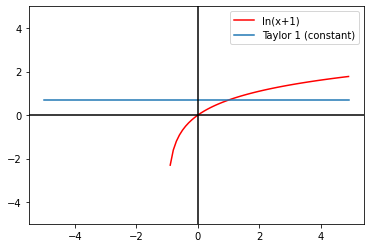

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_ln = np.log(values+1)
t_ln1 = [taylor(ln(x+1), 1, 1).subs(x,v) for v in values]
legends = ['ln(x+1) ','Taylor 1 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_ln, color ='red')
ax.plot(values,t_ln1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


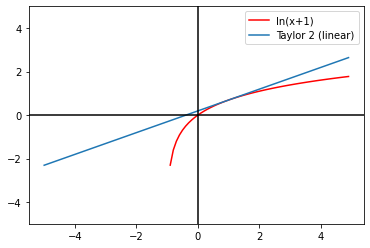

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_ln = np.log(values+1)
t_ln1 = [taylor(ln(x+1), 1, 2).subs(x,v) for v in values]
legends = ['ln(x+1) ','Taylor 2 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_ln, color ='red')
ax.plot(values,t_ln1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


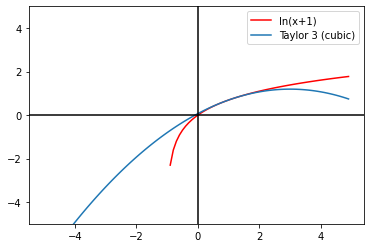

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_ln = np.log(values+1)
t_ln1 = [taylor(ln(x+1), 1, 3).subs(x,v) for v in values]
legends = ['ln(x+1) ','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_ln, color ='red')
ax.plot(values,t_ln1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


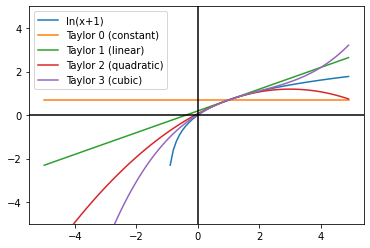

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_ln = np.log(values+1)
t_ln1 = [taylor(ln(x+1), 1, 1).subs(x,v) for v in values]
t_ln2 = [taylor(ln(x+1), 1, 2).subs(x,v) for v in values]
t_ln3 = [taylor(ln(x+1), 1, 3).subs(x,v) for v in values]
t_ln4 = [taylor(ln(x+1






), 1, 4).subs(x,v) for v in values]
legends = ['ln(x+1) ','Taylor 0 (constant)','Taylor 1 (linear)','Taylor 2 (quadratic)','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_ln)
ax.plot(values,t_ln1)
ax.plot(values,t_ln2)
ax.plot(values,t_ln3)
ax.plot(values,t_ln4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()